<a href="https://colab.research.google.com/github/Chrisbv2/Challenge-1_Data-Science/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,"164,300","6,900",16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,5,-74
1,Mesa de comedor,Muebles,"192,300","8,400",18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6,-76
2,Juego de mesa,Juguetes,"209,600","15,900",15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10,-76
3,Microondas,Electrodomésticos,"757,500","41,000",03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3,-77
4,Silla de oficina,Muebles,"335,200","20,200",07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6,-76


#1. Análisis de facturación



In [ ]:
tienda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Producto                2359 non-null   object 
 1   Categoría del Producto  2359 non-null   object 
 2   Precio                  2359 non-null   float64
 3   Costo de envío          2359 non-null   float64
 4   Fecha de Compra         2359 non-null   object 
 5   Vendedor                2359 non-null   object 
 6   Lugar de Compra         2359 non-null   object 
 7   Calificación            2359 non-null   int64  
 8   Método de pago          2359 non-null   object 
 9   Cantidad de cuotas      2359 non-null   int64  
 10  lat                     2359 non-null   float64
 11  lon                     2359 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 221.3+ KB


En este primer análisis, debes calcular el ingreso total de cada tienda. Sumando los valores de la columna Precio de cada conjunto de datos de la tienda para estimar los ingresos.

In [ ]:
'''ingr_total_t1 = tienda['Precio'].sum()
ingr_total_t2 = tienda2['Precio'].sum()
ingr_total_t3 = tienda3['Precio'].sum()
ingr_total_t4 = tienda4['Precio'].sum()

print(f"El ingreso total de la tienda 1 es: {ingr_total_t1}")
print(f"El ingreso total de la tienda 2 es: {ingr_total_t2}")
print(f"El ingreso total de la tienda 3 es: {ingr_total_t3}")
print(f"El ingreso total de la tienda 4 es: {ingr_total_t4}")
'''

def obtener_ingresos(*tiendas):
  ingresos = {f'Tienda {i}': t['Precio'].sum() for i, t in enumerate(tiendas, start=1)}

  df_ingresos = pd.DataFrame(list(ingresos.items()), columns=['Tienda', 'Ingresos'])

  pd.set_option('display.float_format', '{:,.0f}'.format)

  return df_ingresos

df_ingresos= obtener_ingresos(tienda, tienda2, tienda3, tienda4)
print(df_ingresos)


     Tienda      Ingresos
0  Tienda 1 1,150,880,400
1  Tienda 2 1,116,343,500
2  Tienda 3 1,098,019,600
3  Tienda 4 1,038,375,700


# 2. Ventas por categoría

En este debes calcular la cantidad de productos vendidos por categoría en cada tienda. La idea es agrupar los datos por categoría y contar el número de ventas de cada tipo, mostrando las categorías más populares de cada tienda.


In [ ]:
def ventas_por_categoria(*tiendas):
    categorias = {
        f'Tienda {i}': t['Categoría del Producto'].value_counts()
        for i, t in enumerate(tiendas, start=1)
    }

    df = pd.DataFrame(categorias).fillna(0).astype(int)
    df.index.name = "Categoría"     # nombre del índice
    df = df.reset_index()           # convertir índice en columna

    return df

df_categorias = ventas_por_categoria(tienda, tienda2, tienda3, tienda4)
print(df_categorias)

                 Categoría  Tienda 1  Tienda 2  Tienda 3  Tienda 4
0  Artículos para el hogar       171       181       177       201
1     Deportes y diversión       284       275       277       277
2        Electrodomésticos       312       305       278       254
3             Electrónicos       448       422       451       451
4   Instrumentos musicales       182       224       177       170
5                 Juguetes       324       313       315       338
6                   Libros       173       197       185       187
7                  Muebles       465       442       499       480


# 3. Calificación promedio de la tienda


En este paso, debes calcular las calificaciones promedio de los clientes para cada tienda. El objetivo es conocer la satisfacción del cliente con los productos vendidos.

In [ ]:
def calificaciones_promedio(*tiendas):
  promedios = {
      f'Tienda {i}' : t['Calificación'].mean()
      for i, t in enumerate(tiendas, start=1)
  }

  df_promedios = pd.DataFrame(promedios.items(), columns=['Tienda', 'Calificación Promedio'])
  pd.set_option('display.float_format', '{:,.2f}'.format)
  return df_promedios

df_promedios = calificaciones_promedio(tienda, tienda2, tienda3, tienda4)
print(df_promedios)




     Tienda  Calificación Promedio
0  Tienda 1                   3.98
1  Tienda 2                   4.04
2  Tienda 3                   4.05
3  Tienda 4                   4.00


# 4. Productos más y menos vendidos

En este paso, debes identificar qué productos fueron los más vendidos y los menos vendidos en cada tienda. Visualiza los resultados para que quede claro qué productos destacaron en ventas en cada tienda.

In [ ]:
tienda['Producto'].value_counts()

,count
Producto,
Microondas,60
TV LED UHD 4K,60
Armario,60
Secadora de ropa,58
Mesa de noche,56
Bloques de construcción,56
Balón de baloncesto,55
Bicicleta,54
Vaso térmico,54


In [ ]:
def productos_mas_menos_vendidos(*tiendas):
    resultados = {}

    for i, tienda in enumerate(tiendas, start=1):
        # Contar cuántas veces se vendió cada producto
        conteo = tienda['Producto'].value_counts()

        max_ventas = conteo.max()   # mayor número de ventas
        min_ventas = conteo.min()   # menor número de ventas

        # Obtener TODOS los productos con el máximo y mínimo
        productos_mas = conteo[conteo == max_ventas].index.tolist()
        productos_menos = conteo[conteo == min_ventas].index.tolist()

        # Guardar resultados en un diccionario
        resultados[f"Tienda {i}"] = {
            "Productos más vendidos": productos_mas,
            f"Ventas (más vendidos)": max_ventas,
            "Productos menos vendidos": productos_menos,
            f"Ventas (menos vendidos)": min_ventas
        }

    return resultados


resultados = productos_mas_menos_vendidos(tienda, tienda2, tienda3, tienda4)

df_resultados = pd.DataFrame(resultados).T
print(df_resultados)

                        Productos más vendidos Ventas (más vendidos)  \
Tienda 1  [Microondas, TV LED UHD 4K, Armario]                    60   
Tienda 2           [Iniciando en programación]                    65   
Tienda 3                       [Kit de bancas]                    57   
Tienda 4                            [Cama box]                    62   

                           Productos menos vendidos Ventas (menos vendidos)  
Tienda 1  [Auriculares con micrófono, Celular ABXY]                      33  
Tienda 2                            [Juego de mesa]                      32  
Tienda 3                  [Bloques de construcción]                      35  
Tienda 4                       [Guitarra eléctrica]                      33  


# 5. Envío promedio por tienda

In [ ]:
def envio_promedio_por_tienda(*tiendas):

    promedios = {
        f"Tienda {i}": t["Costo de envío"].mean()
        for i, t in enumerate(tiendas, start=1)
    }

    df_envios = pd.DataFrame(promedios.items(), columns=["Tienda", "Envío Promedio"])
    return df_envios

df_envios = envio_promedio_por_tienda(tienda, tienda2, tienda3, tienda4)
print(df_envios)

     Tienda  Envío Promedio
0  Tienda 1       26,018.61
1  Tienda 2       25,216.24
2  Tienda 3       24,805.68
3  Tienda 4       23,459.46


# Gráficas

## Ingresos por tienda

In [ ]:
from matplotlib import pyplot as plt

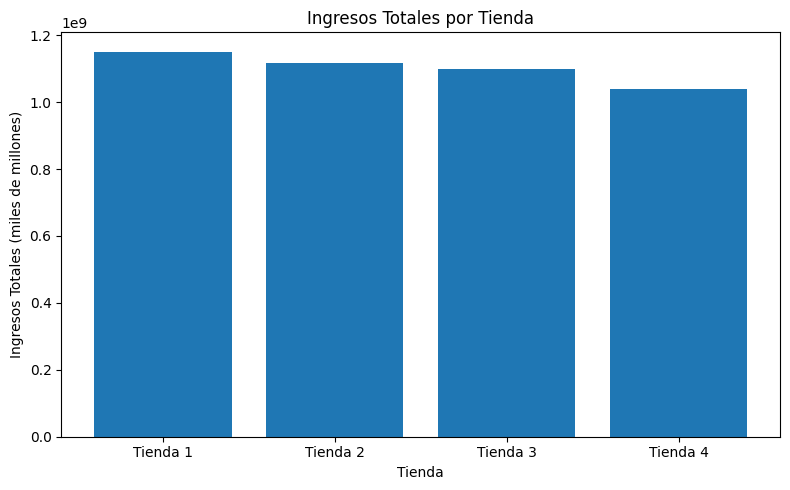

In [ ]:
df_ingresos = obtener_ingresos(tienda, tienda2, tienda3, tienda4)

plt.figure(figsize=(8,5))
plt.bar(df_ingresos["Tienda"], df_ingresos["Ingresos"])

plt.title("Ingresos Totales por Tienda")
plt.xlabel("Tienda")
plt.ylabel("Ingresos Totales (miles de millones)")
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()


## Ventas por categoría

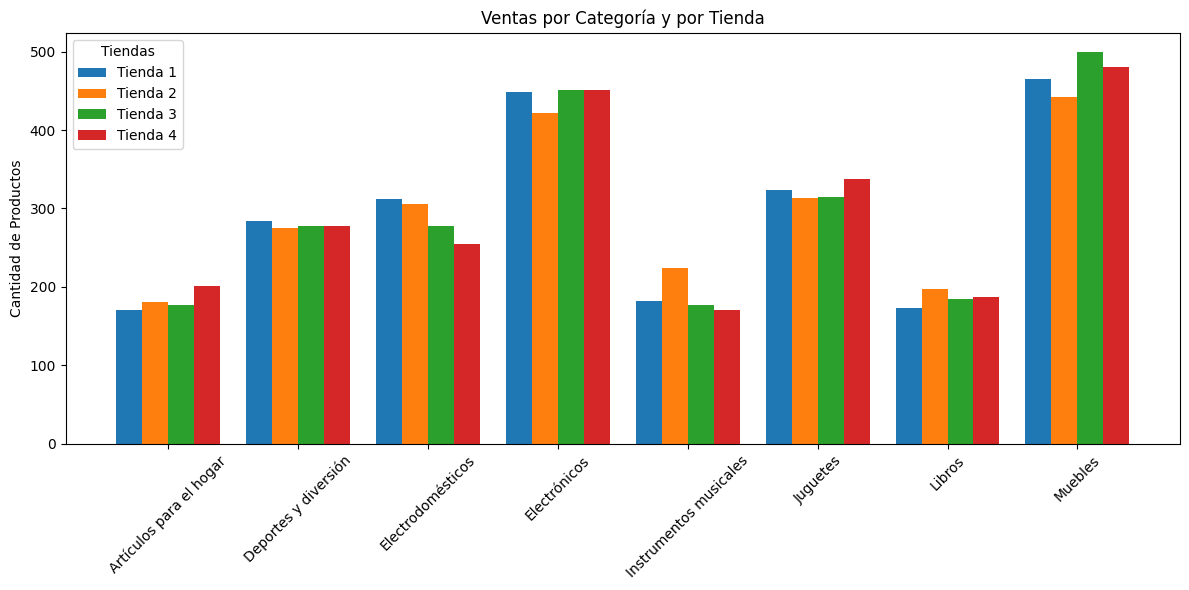

In [ ]:
import numpy as np

df = df_categorias.copy()

categorias = df['Categoría']
tiendas = df.columns[1:]   # columnas Tienda 1, Tienda 2...

x = np.arange(len(categorias))  # posiciones de las categorías
width = 0.2                     # ancho de cada barra

plt.figure(figsize=(12,6))

for i, tienda in enumerate(tiendas):
    plt.bar(x + i*width, df[tienda], width, label=tienda)

plt.xticks(x + width * (len(tiendas)-1)/2, categorias, rotation=45)
plt.ylabel('Cantidad de Productos')
plt.title('Ventas por Categoría y por Tienda')
plt.legend(title='Tiendas')
plt.tight_layout()
plt.show()

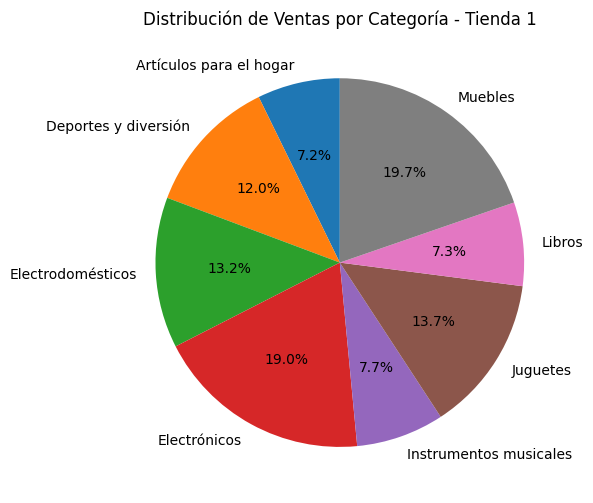

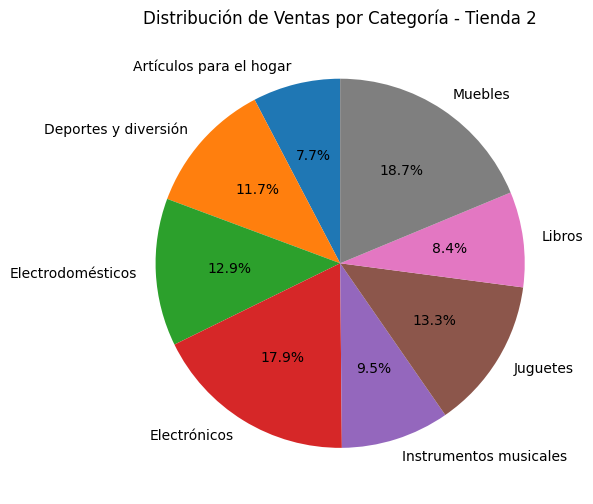

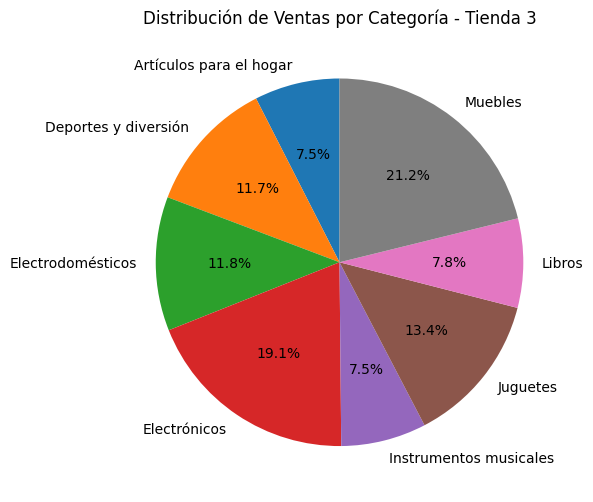

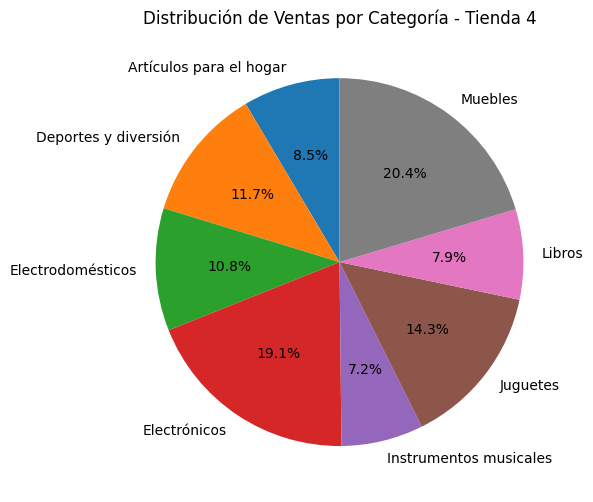

In [ ]:
import matplotlib.pyplot as plt

df = df_categorias.copy()
df.set_index("Categoría", inplace=True)

for tienda in df.columns:
    plt.figure(figsize=(6,6))
    plt.pie(df[tienda], labels=df.index, autopct='%1.1f%%', startangle=90)
    plt.title(f'Distribución de Ventas por Categoría - {tienda}')
    plt.tight_layout()
    plt.show()

## Calificación de Tiendas

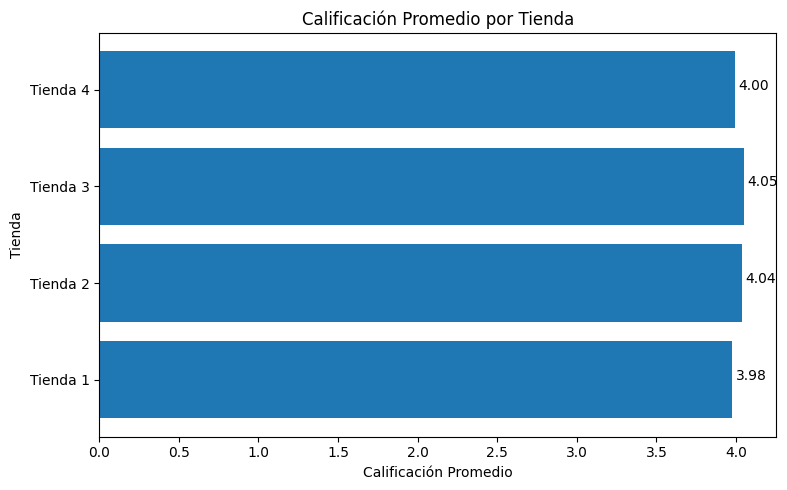

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.barh(df_promedios['Tienda'], df_promedios['Calificación Promedio'])

plt.title('Calificación Promedio por Tienda')
plt.xlabel('Calificación Promedio')
plt.ylabel('Tienda')

# Mostrar los valores al final de cada barra
for index, value in enumerate(df_promedios['Calificación Promedio']):
    plt.text(value + 0.02, index, f'{value:.2f}')

plt.tight_layout()
plt.show()

## Productos más y menos vendidos

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df_plot = pd.DataFrame({
    "Tienda": df_resultados.index,
    "Más Vendidos": df_resultados["Ventas (más vendidos)"].astype(int),
    "Menos Vendidos": df_resultados["Ventas (menos vendidos)"].astype(int)
})

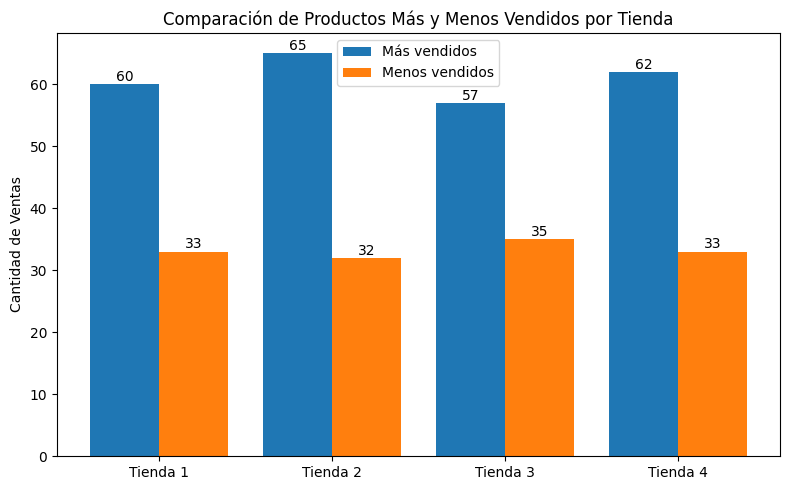

In [ ]:
plt.figure(figsize=(8,5))

x = range(len(df_plot))

plt.bar([i - 0.2 for i in x], df_plot["Más Vendidos"], width=0.4, label="Más vendidos")
plt.bar([i + 0.2 for i in x], df_plot["Menos Vendidos"], width=0.4, label="Menos vendidos")

plt.xticks(x, df_plot["Tienda"])
plt.ylabel("Cantidad de Ventas")
plt.title("Comparación de Productos Más y Menos Vendidos por Tienda")

for i, v in enumerate(df_plot["Más Vendidos"]):
    plt.text(i - 0.2, v + 0.5, str(v), ha='center')

for i, v in enumerate(df_plot["Menos Vendidos"]):
    plt.text(i + 0.2, v + 0.5, str(v), ha='center')

plt.legend()
plt.tight_layout()
plt.show()

## Calificaciones y costo de envío promedio

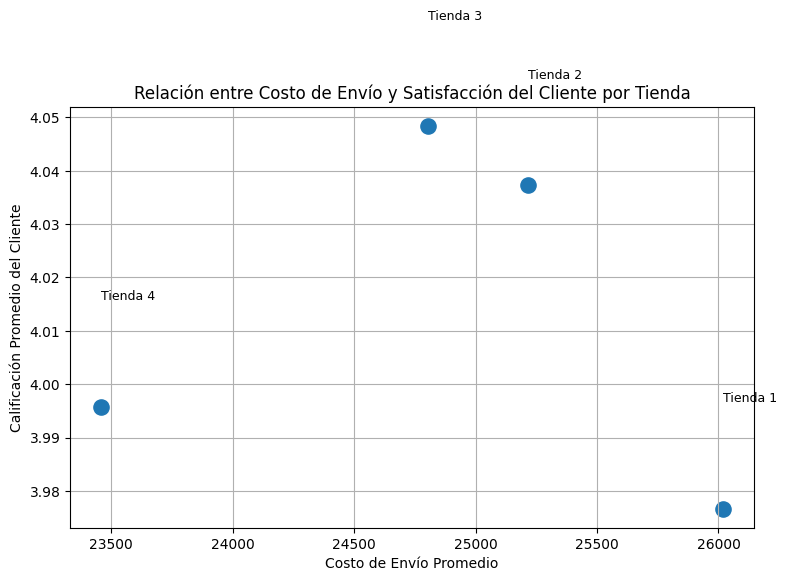

In [ ]:
import matplotlib.pyplot as plt

# Combinar los dos DataFrames en uno solo
df_scatter = pd.merge(df_promedios, df_envios, on="Tienda")

plt.figure(figsize=(8,6))
plt.scatter(df_scatter["Envío Promedio"], df_scatter["Calificación Promedio"], s=120)

# Agregar etiquetas a cada punto con el nombre de la tienda
for i, row in df_scatter.iterrows():
    plt.text(
        row["Envío Promedio"] + 0.02,
        row["Calificación Promedio"] + 0.02,
        row["Tienda"],
        fontsize=9
    )

plt.xlabel("Costo de Envío Promedio")
plt.ylabel("Calificación Promedio del Cliente")
plt.title("Relación entre Costo de Envío y Satisfacción del Cliente por Tienda")
plt.grid(True)
plt.tight_layout()
plt.show()

 # 🟦 **Informe Final – Análisis de Desempeño de Tiendas del Sr. Juan**

## 🟥 **Introducción**

El propósito de este análisis es identificar cuál de las cuatro tiendas del Sr. Juan presenta el **menor desempeño general** y, por lo tanto, es la mejor candidata para ser vendida.  
Para ello, se evaluaron variables clave del negocio, incluyendo:

- Ingresos totales por tienda  
- Distribución de ventas por categoría  
- Calificaciones promedio de los clientes  
- Productos más y menos vendidos  
- Costos de envío promedio  

Con base en los datos brindados y en las visualizaciones generadas, se determinó qué tienda tiene el rendimiento más débil de forma consistente.

---

## 🟧 **Desarrollo del Análisis**

### 📊 **1. Ingresos Totales por Tienda**

Los ingresos revelan una clara diferencia entre las cuatro tiendas:

| Tienda | Ingresos |
|--------|--------------|
| **Tienda 1** | 1,150,880,400 |
| **Tienda 2** | 1,116,343,500 |
| **Tienda 3** | 1,098,019,600 |
| **Tienda 4** | 1,038,375,700 |

🔎 **Hallazgo clave:**  
La **Tienda 4** obtiene los ingresos más bajos, generando:

- **$112.5 millones menos** que la Tienda 1  

- **$78 millones menos** que el promedio general  

📉 Esto indica una menor capacidad de generar valor económico.

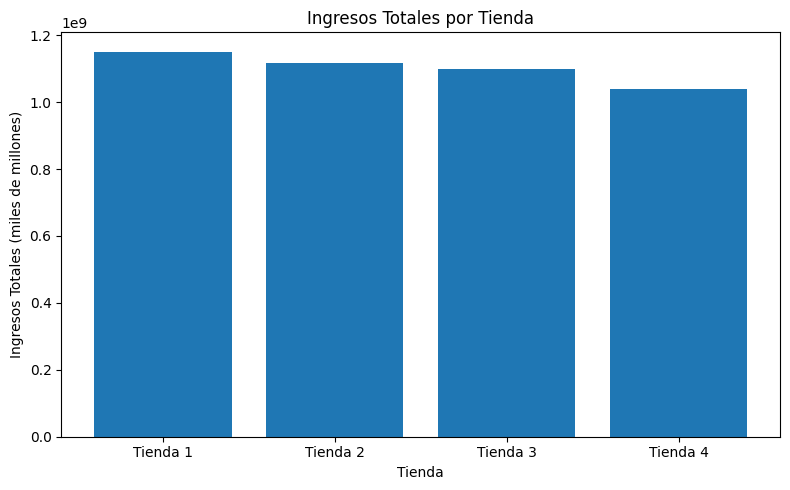
---

## 📦 **2. Ventas por Categoría**

El análisis del volumen de ventas por categoría muestra que la **Tienda 4** presenta los valores más bajos en:

- **Instrumentos musicales:** 170 unidades  
- **Electrodomésticos:** 254 unidades  

En contraste, otras tiendas tuvieron resultados más equilibrados y superiores en estas mismas categorías.


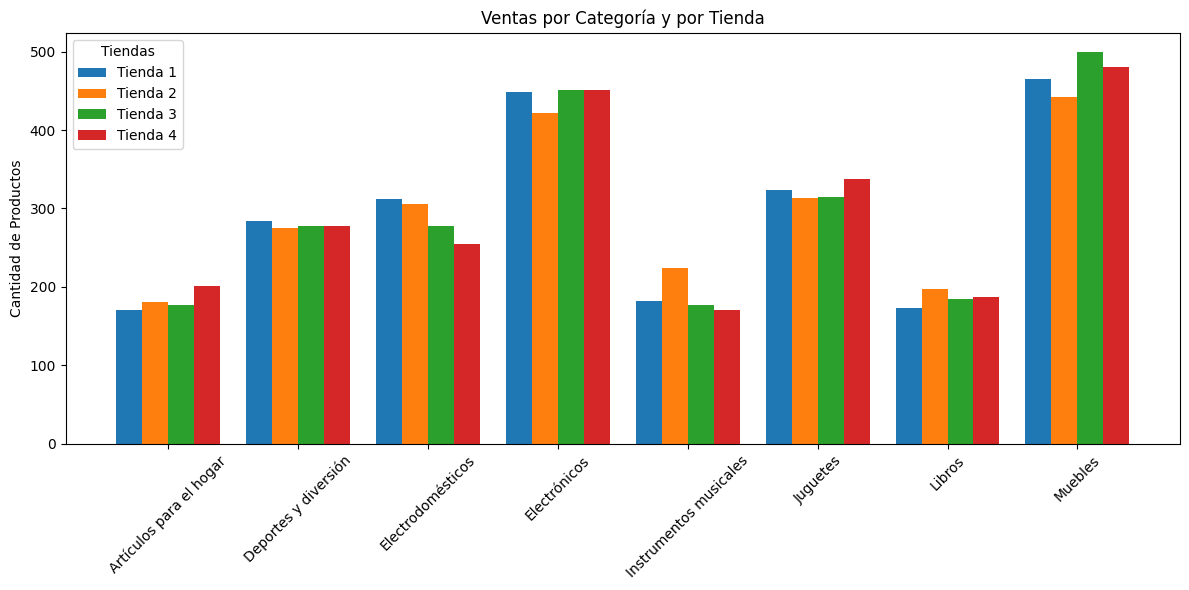

## ⭐ **3. Calificaciones Promedio de Clientes**

| Tienda | Calificación Promedio |
|---------|--------------------------|
| Tienda 1 | 3.98 |
| Tienda 2 | 4.04 |
| Tienda 3 | 4.05 |
| Tienda 4 | 4.00 |

Aunque las calificaciones son relativamente similares, la Tienda 4 **no destaca** ni compensa con un servicio superior sus debilidades comerciales.

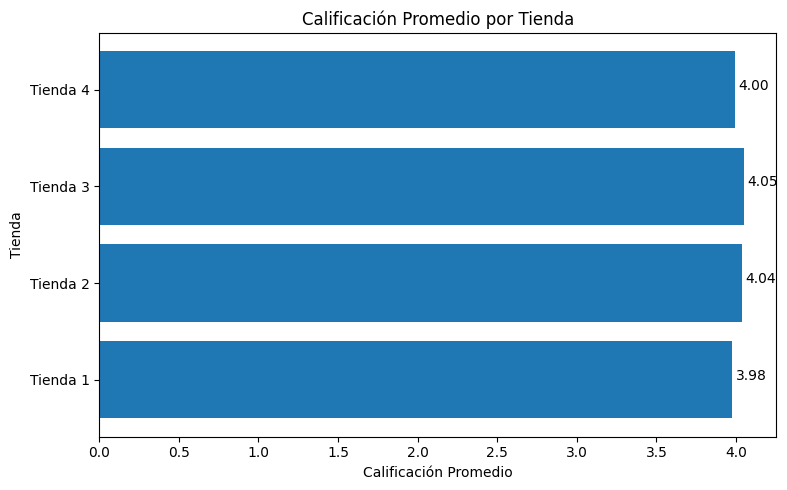

## 🛒 **4. Productos Más y Menos Vendidos**

### 📈 Productos más vendidos por tienda:
- **Tienda 1:** Microondas, TV LED UHD 4K, Armario (60 unidades)  
- **Tienda 2:** Iniciando en programación (65 unidades)  
- **Tienda 3:** Kit de bancas (57 unidades)  
- **Tienda 4:** Cama box (62 unidades)

### 📉 Productos menos vendidos:
- **Tienda 1:** Auriculares con micrófono, Celular ABXY (33 unidades)  
- **Tienda 2:** Juego de mesa (32 unidades)  
- **Tienda 3:** Bloques de construcción (35 unidades)  
- **Tienda 4:** Guitarra eléctrica (33 unidades)

🔎 **Hallazgo clave:**  
Si bien la Tienda 4 tiene un producto “más vendido” aceptable, su rendimiento general en ventas **no destaca** y está por debajo del resto en categorías importantes.

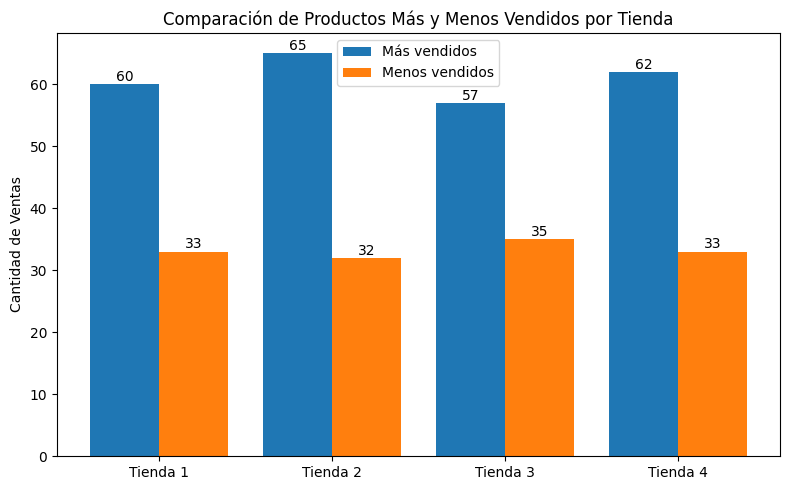

## 🚚 **5. Costo de Envío Promedio**

| Tienda | Envío Promedio |
|--------|--------------------|
| Tienda 1 | 26,018.61 |
| Tienda 2 | 25,216.24 |
| Tienda 3 | 24,805.68 |
| Tienda 4 | 23,459.46 |

Aunque la Tienda 4 presenta el envío promedio más bajo, esto probablemente refleja un **menor volumen de operaciones**, y no necesariamente mayor eficiencia.

---

## 🟩 **Conclusión y Recomendación Final**

Tras integrar los diferentes indicadores analizados, se concluye que la **Tienda 4** es la menos eficiente y, por lo tanto, **es la mejor candidata para vender**.

### 📌 Razones principales:

1. **Bajos ingresos totales**, con una diferencia considerable respecto al resto.  
2. **Desempeño más débil en categorías clave**, especialmente electrodomésticos e instrumentos musicales.  
3. **Servicio al cliente promedio**, que no compensa otras debilidades.  
4. **Costos de envío más bajos**, probablemente por menor actividad comercial.  
5. **Desempeño comercial inconsistente**, sin categorías que compensen sus áreas débiles.

---



## 🟦 **Recomendación Final**

👉 **El Sr. Juan debe vender la *Tienda 4*.**  
Su rendimiento general es inferior y su potencial de crecimiento es limitado en comparación con las otras tiendas.  
Liberarse de esta unidad permitirá al Sr. Juan concentrar sus recursos en tiendas más rentables y con mejores perspectivas.

# Análisis Geográfico

## 🧭 Introducción

El propósito de este análisis es explorar cómo la ubicación geográfica influye en el rendimiento de las tiendas. Utilizando las columnas lat (latitud) y lon (longitud), se busca identificar patrones espaciales en las ventas, evaluando:
- Distribución de ventas por ubicación
- Áreas con mayor concentración de compras
- Diferencias en rendimiento entre tiendas dependiendo de la región
- Posibles patrones geográficos que impacten ingresos y calificaciones

Este estudio ayudará a comprender si la localización tiene un papel relevante en el comportamiento de compra y en el desempeño de cada tienda.

In [ ]:
import matplotlib.pyplot as plt

def scatter_ventas(tienda, nombre):
    plt.figure(figsize=(8,6))
    plt.scatter(tienda["lon"], tienda["lat"], alpha=0.5)
    plt.title(f"Distribución geográfica de las ventas - {nombre}")
    plt.xlabel("Longitud")
    plt.ylabel("Latitud")
    plt.grid(True)
    plt.show()

scatter_ventas(tienda, "Tienda 1")
scatter_ventas(tienda2, "Tienda 2")
scatter_ventas(tienda3, "Tienda 3")
scatter_ventas(tienda4, "Tienda 4")